# First Order System
현재 시간의 상태가 이전 시간의 상태와 관련이 있다고 가정    

## 이전 시간의 상태만 입력으로
> Autonomous System이라고도 하며, 외부 입력 없이 자기 혼자서 돌아가는 특징이 있습니다.

수식은 아래와 같다.
$$
x_t = f(x_{t-1})
$$
- $x$ : 상태
- $t$ : 시간
- $x_t$: t시간일 때의 상태  
- $x_{t-1}$: t-1시간(이전 시간)일 때의 상태

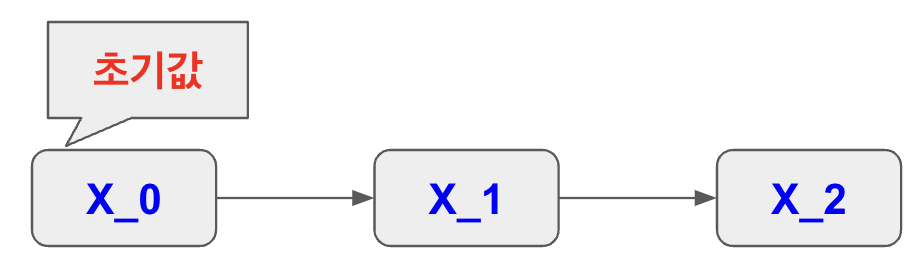

## 이전 시간의 상태와 현재 값을 입력으로
수식은 아래와 같다.
$$
x_t = f(x_{t-1},u_t)
$$
- $x$ : 상태
- $t$ : 시간
- $u_t$: t시간일 때의 현재(입력) 값
- $x_t$: t시간일 때의 상태  
- $x_{t-1}$: t-1시간(이전 시간)일 때의 상태

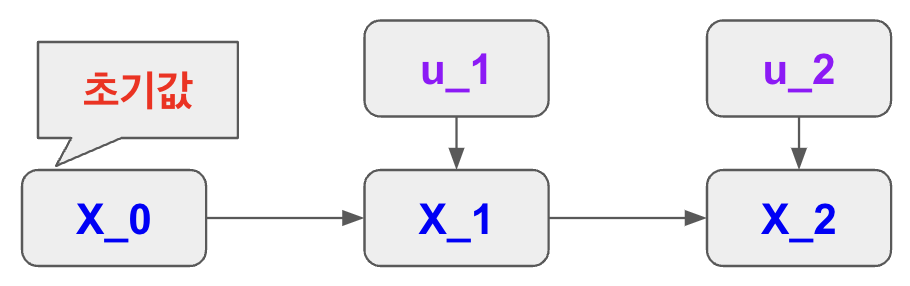

# State-Space Model
- 1차원 시스템의 모형(First Order System):     
$$
x_t = f(x_{t-1}, u_t)
$$
- 각 시간에서 관측 가능한 상태($x_t$)의 모음: 출력 $y_t$
$$
y_t = h(x_t)
$$

- $x$ : 상태(hidden layer의 state)
- $t$ : 시간
- $u_t$: t시간일 때의 현재(입력) 값
- $x_t$: t시간일 때의 상태  
- $x_{t-1}$: t-1시간(이전 시간)일 때의 상태
- $y_t$: t시간일 때의 출력 값

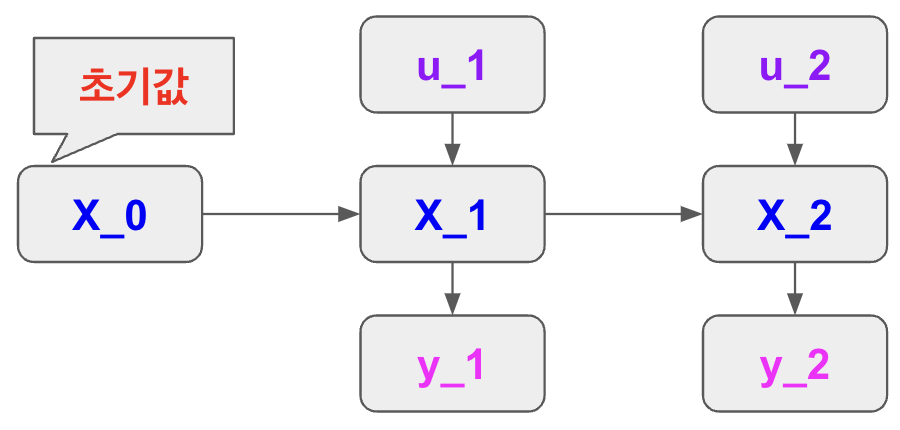

# [RNN(Recurrent Neural Networks)](https://ko.wikipedia.org/wiki/%EC%88%9C%ED%99%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D)
- RNN이란 Recurrent Neural Networks의 약자로, 순환 신경망을 뜻합니다. 순환 신경망이라는 이름은 입력받는 신호의 길이가 한정되지 않은 동적 데이터를 처리한다는 점에서 붙여진 이름입니다.    

CNN vs RNN
- CNN은 이미지 구역별로 같은 weight를 공유한다.
- RNN은 시간별 같은 weight를 공유한다.

## RNN 특징
- $h_t$는 t일 때의 hidden layer 상태를 나타낸다.
- $h_t$는 이전까지의 상태($h_{0}, h_{t-1}$)와 이전까지의 입력($x_{t-1}, x_t$)을 대표할 수 있는 압축본이라고 할 수 있습니다.

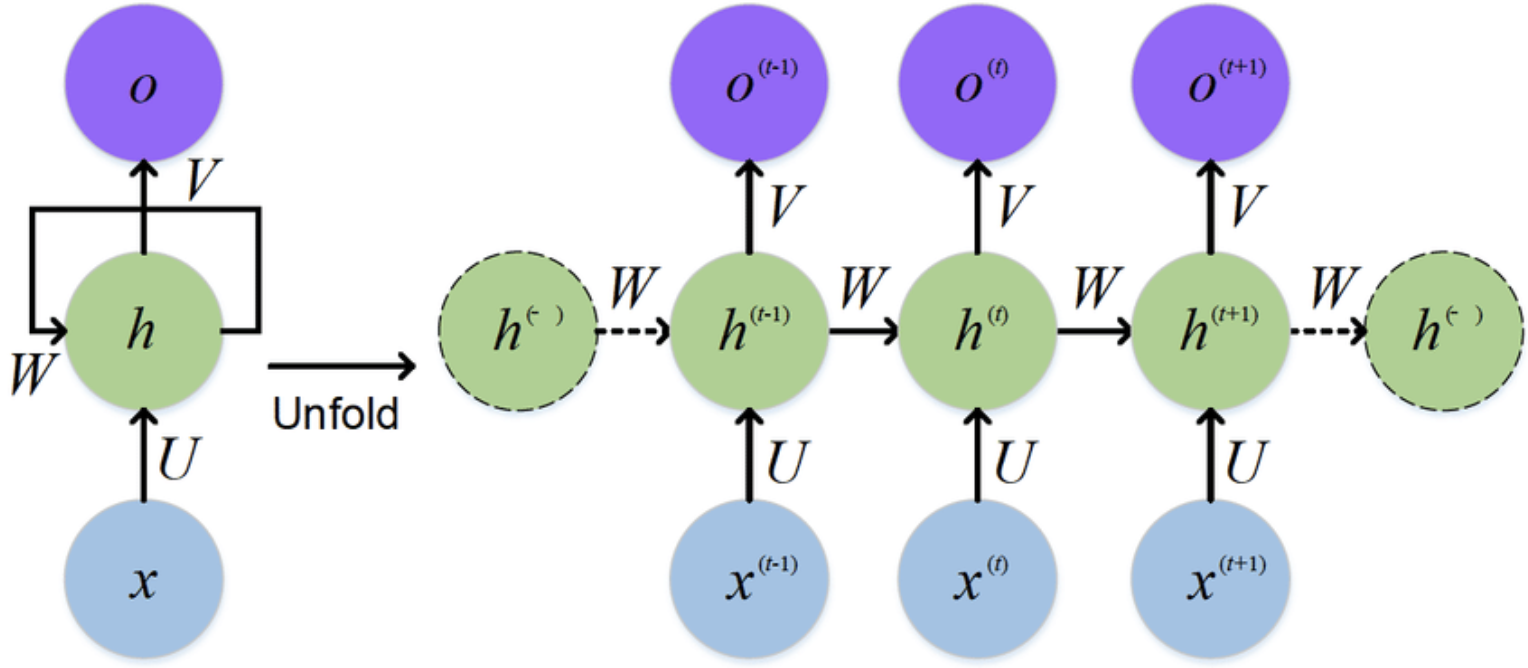

## RNN 구조 종류

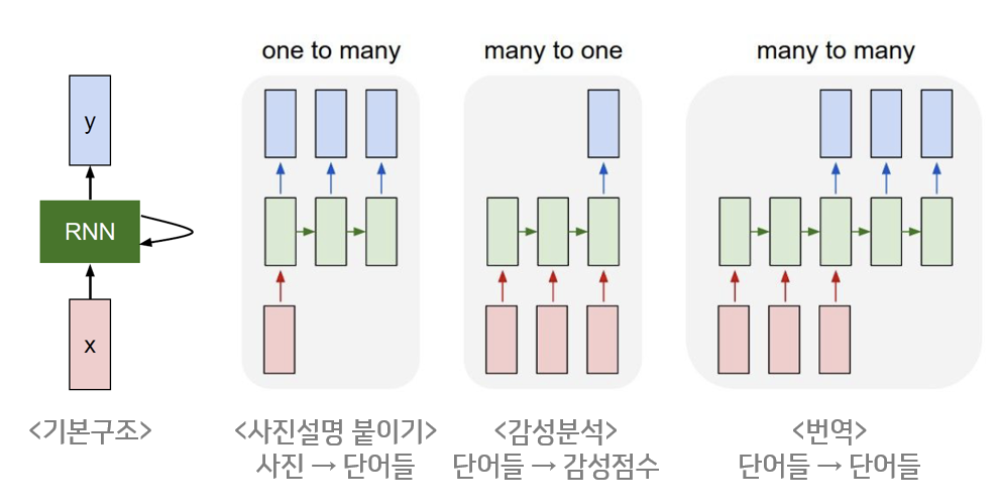

## [RNN 연산](https://wikidocs.net/22886)

image.png

- 현재 시점 t에서의 은닉 상태값을 $h_t$라고 정의하겠습니다. 은닉층의 메모리 셀은  $h_t$를 계산하기 위해서 총 두 개의 가중치를 가집니다.
- 하나는 입력층을 위한 가중치 $W_x$이고, 하나는 이전 시점 t-1의 은닉 상태값인 $h_{t-1}$을 위한 가중치 $W_h$입니다.

이를 식으로 표현하면 다음과 같습니다.
- 은닉층: $h_t = tanh(W_x x_t + W_h h_{t-1} + b)$
- 출력층: $y_t = f(W_y h_t +b)$
  - f()는 activate function

image.png

# [Ver 1 TextRNN](https://colab.research.google.com/github/graykode/nlp-tutorial/blob/master/3-1.TextRNN/TextRNN.ipynb)

## Data

### 데이터 생성

In [1]:
sentences = ["i like dog", "i love coffee", "i hate milk"]
sentences

['i like dog', 'i love coffee', 'i hate milk']

### 데이터 토큰화

In [2]:
word_list = " ".join(sentences).split()
word_list

['i', 'like', 'dog', 'i', 'love', 'coffee', 'i', 'hate', 'milk']

In [3]:
word_list = list(set(word_list))
word_list

['milk', 'like', 'dog', 'hate', 'i', 'coffee', 'love']

### 데이터 사전

In [4]:
word_dict = {w: i for i, w in enumerate(word_list)}
word_dict

{'milk': 0, 'like': 1, 'dog': 2, 'hate': 3, 'i': 4, 'coffee': 5, 'love': 6}

In [5]:
number_dict = {i: w for i, w in enumerate(word_list)}
number_dict

{0: 'milk', 1: 'like', 2: 'dog', 3: 'hate', 4: 'i', 5: 'coffee', 6: 'love'}

In [6]:
n_class = len(word_dict)
batch_size = len(sentences)
n_class, batch_size

(7, 3)

In [7]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

## Dataset

### 디버깅

In [8]:
sen = sentences[0]
sen

'i like dog'

In [9]:
word = sen.split() # 토큰화
word

['i', 'like', 'dog']

In [10]:
word[:-1]

['i', 'like']

In [11]:
input = [word_dict[n] for n in word[:-1]] # 인베딩 (문자 -> 숫자)
input

[4, 1]

In [12]:
[number_dict[n] for n in input] # 숫자 -> 문자

['i', 'like']

In [13]:
target = word_dict[word[-1]]
target, number_dict[target]

(2, 'dog')

In [14]:
n_class

7

In [15]:
np.eye(n_class)

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

In [16]:
np.eye(n_class)[input] # 원핫인코딩

array([[0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.]])

### Dataset 생성

In [17]:
def make_batch():
    input_batch = []
    target_batch = []

    for sen in sentences:
        word = sen.split()  # space tokenizer
        input = [word_dict[n] for n in word[:-1]]  # create (1~n-1) as input
        target = word_dict[word[-1]]  # create (n) as target, We usually call this 'casual language model'

        input_batch.append(np.eye(n_class)[input]) # 원핫인코딩
        target_batch.append(target)

    return input_batch, target_batch

In [18]:
input_batch, target_batch = make_batch()
np.array(input_batch).shape # [batch_size, featuers_size, embedding_size]

(3, 2, 7)

## RNN Model

In [23]:
target_batch

[2, 5, 0]

In [25]:
input_batch

tensor([[[0., 0., 0., 0., 1., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1.]],

        [[0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0.]]])

In [19]:
n_hidden = 5 # number of hidden units in one cell

### 디버깅

In [20]:
rnn = nn.RNN(input_size=n_class, hidden_size=n_hidden)

In [21]:
input_batch = torch.FloatTensor(input_batch)
input_batch.shape

<ipython-input-21-c46ec3f236b6>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  input_batch = torch.FloatTensor(input_batch)


torch.Size([3, 2, 7])

In [ ]:
input_batch_transpose = input_batch.transpose(0, 1)
input_batch_transpose.shape # (featuers_size, batch_size, embedding_size)

torch.Size([2, 3, 7])

In [ ]:
init_hidden = torch.zeros(1, batch_size, n_hidden) # hidden 초기값
init_hidden.shape # (1, batch_size, rnn_hidden_size)

torch.Size([1, 3, 5])

학습

In [ ]:
outputs, hidden = rnn(input_batch_transpose, init_hidden)
outputs.shape, hidden.shape

(torch.Size([2, 3, 5]), torch.Size([1, 3, 5]))

In [ ]:
outputs = outputs[-1]
outputs.shape

torch.Size([3, 5])

In [ ]:
linear = nn.Linear(n_hidden, n_class, bias=False)

In [ ]:
pred = linear(outputs)
pred.shape

torch.Size([3, 7])

### RNN 모델 생성

In [26]:
class TextRNN(nn.Module):
    def __init__(self):
        super(TextRNN, self).__init__()
        self.rnn = nn.RNN(input_size=n_class, hidden_size=n_hidden)
        self.linear = nn.Linear(n_hidden, n_class, bias=False)

    def forward(self, hidden, X):
        X = X.transpose(0, 1)
        outputs, hidden = self.rnn(X, hidden)
        outputs = outputs[-1]
        pred = self.linear(outputs)
        return pred

In [27]:
model = TextRNN()
model

TextRNN(
  (rnn): RNN(7, 5)
  (linear): Linear(in_features=5, out_features=7, bias=False)
)

In [28]:
!pip install torchinfo

In [29]:
import torchinfo

In [30]:
hidden = torch.zeros(1, batch_size, n_hidden)
hidden.shape

torch.Size([1, 3, 5])

In [31]:
input_batch, target_batch = make_batch()
input_batch = torch.FloatTensor(input_batch)
input_batch.shape

torch.Size([3, 2, 7])

In [32]:
torchinfo.summary(
    model, ((1, 3, 5), (3, 2, 7)),
    # dtypes=[torch.long],
    col_width=16,
    col_names=["kernel_size", "output_size", "num_params", "mult_adds"])

Layer (type:depth-idx)                   Kernel Shape     Output Shape     Param #          Mult-Adds
TextRNN                                  --               [3, 7]           --               --
├─RNN: 1-1                               --               [2, 3, 5]        70               420
├─Linear: 1-2                            --               [3, 7]           35               105
Total params: 105
Trainable params: 105
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

## Training

In [33]:
model = TextRNN()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

input_batch, target_batch = make_batch()
input_batch = torch.FloatTensor(input_batch)
target_batch = torch.LongTensor(target_batch)

# Training
for epoch in range(5000):

    # hidden : [num_layers * num_directions, batch, hidden_size]
    hidden = torch.zeros(1, batch_size, n_hidden)
    # input_batch : [batch_size, n_step, n_class]
    output = model(hidden, input_batch)

    # output : [batch_size, n_class], target_batch : [batch_size] (LongTensor, not one-hot)
    loss = criterion(output, target_batch)
    if (epoch + 1) % 1000 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 1000 cost = 0.210091
Epoch: 2000 cost = 0.043757
Epoch: 3000 cost = 0.014719
Epoch: 4000 cost = 0.006482
Epoch: 5000 cost = 0.003303


## Predict

In [34]:
hidden = torch.zeros(1, batch_size, n_hidden)
hidden.shape

torch.Size([1, 3, 5])

In [35]:
pred = model(hidden, input_batch)
pred.shape

torch.Size([3, 7])

In [36]:
pred_soft = pred.softmax(dim=1)
pred_soft.shape

torch.Size([3, 7])

In [37]:
pred_max = pred_soft.argmax(dim=1)
pred_max.shape

torch.Size([3])

In [38]:
input = [sen.split()[:2] for sen in sentences]

print([sen.split()[:2] for sen in sentences], '->', [number_dict[n.item()] for n in pred_max])

[['i', 'like'], ['i', 'love'], ['i', 'hate']] -> ['dog', 'coffee', 'milk']


# Ver2 TextRNN

In [39]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

## Data

In [40]:
sentences = ["i like dog", "i love coffee", "i hate milk"]
sentences

['i like dog', 'i love coffee', 'i hate milk']

## Vocab

In [41]:
class Vocab:
  def __init__(self, sentences):
    _word_list = " ".join(sentences).split()
    _word_list = list(set(_word_list))
    self._len_word = len(_word_list)
    self.word_dict = {w: i for i, w in enumerate(_word_list)}
    self.number_dict = {i: w for i, w in enumerate(_word_list)}

  def to_number(self, p_str):
    return self.word_dict[p_str]

  def to_word(self, p_int):
    return self.number_dict[p_int]

  def __len__(self):
    return self._len_word

In [42]:
vocab = Vocab(sentences)

In [43]:
vocab.to_number("i")

4

In [44]:
vocab.to_word(5)

'coffee'

In [45]:
len(vocab)

7

## Dataset

In [46]:
from torch.utils.data import Dataset

In [47]:
class DatasetVer2(Dataset):
  def __init__(self, sentences):
    super().__init__()
    # 1. 어휘집 생성
    self.vocab = Vocab(sentences)
    self.n_class = len(vocab)
    # 2. 원핫 인코딩 메트릭스 생성
    self.one_hot_mat = np.eye(len(self.vocab))
    # 3. features와 target 생성
    self.features, self.targets = self.__create_data(sentences)

  def __create_data(self, sentences):
    features = []
    targets = []

    for sen in sentences:
      # tokenizer
      sen = sen.split()
      # create feature & target
      feature = [ self.vocab.to_number(word) for word in sen[:-1] ] # featuer
      target = self.vocab.to_number(sen[-1]) # target

      # add
      features.append(self.__convert_data(feature))
      targets.append(target)
    return torch.FloatTensor(features), torch.LongTensor(targets)

  def __convert_data(self, feature):
    return self.one_hot_mat[feature]

  def __len__(self):
    return len(self.features)

  def __getitem__(self, idx):

    return self.features[idx], self.targets[idx]

In [48]:
dt = DatasetVer2(sentences)

In [49]:
dt[0]

(tensor([[0., 0., 0., 0., 1., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0.]]),
 tensor(2))

## DataLoader

In [50]:
from torch.utils.data import DataLoader

In [51]:
dl = DataLoader(dt, batch_size=3, shuffle=True)

In [52]:
len(dl)

1

In [53]:
features, targets = next(iter(dl))
features.shape, targets.shape

(torch.Size([3, 2, 7]), torch.Size([3]))

In [54]:
features

tensor([[[0., 0., 0., 0., 1., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1.]],

        [[0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0.]]])

In [55]:
targets

tensor([2, 5, 0])

## [RNN Model](https://pytorch.org/docs/stable/generated/torch.nn.RNN.html)

In [56]:
class TextRNN2(nn.Module):
    def __init__(self, n_class, n_hidden=5, n_layer=3, is_bidirection=True):
        super().__init__()
        # 변수 정의
        self.n_hidden = n_hidden
        self.n_layer = n_layer
        self.is_bidirection = is_bidirection
        # 레이어 정의
        self.rnn = nn.RNN(input_size=n_class, hidden_size=self.n_hidden, num_layers=self.n_layer, bidirectional=self.is_bidirection)
        self.linear = nn.Linear(self.n_hidden, n_class)

    def forward(self, X): # (batch_size, input_size, embedding_size)
        # 초기값 생성 (n_direction * n_layer, batch_size, n_hidden)
        if self.is_bidirection:
            init_hidden = torch.zeros(2*self.n_layer, X.shape[0], self.n_hidden)
        else:
            init_hidden = torch.zeros(1*self.n_layer, X.shape[0], self.n_hidden)

        _input = X.transpose(0, 1) # (input_size, batch_size, embedding_size)
        # _outputs: (input_size, batch_size, embedding_size)
        # _hiddens: (n_direction * n_layer, batch_size, n_hidden)
        _outputs, _hiddens = self.rnn(_input, init_hidden)
        # _hidden: (batch_size, n_hidden)
        _hidden = _hiddens[-1] # 마지막 데이터만 사용
        # pred: (batch_size, n_class)
        pred = self.linear(_hidden)
        return pred


### 디버깅

- init()

In [57]:
n_hidden = 5
n_layer = 3
is_bidirection = True
n_class = dt.n_class

In [58]:
rnn = nn.RNN(input_size=n_class, hidden_size=n_hidden, num_layers=n_layer, bidirectional=is_bidirection)
rnn

RNN(7, 5, num_layers=3, bidirectional=True)

In [59]:
linear = nn.Linear(n_hidden, n_class)
linear

Linear(in_features=5, out_features=7, bias=True)

- forward()

In [60]:
features.shape

torch.Size([3, 2, 7])

In [61]:
if is_bidirection:
    init_hidden = torch.zeros(2*n_layer, features.shape[0], n_hidden)
else:
    init_hidden = torch.zeros(1*n_layer, features.shape[0], n_hidden)

init_hidden.shape

torch.Size([6, 3, 5])

In [62]:
_input = features.transpose(0, 1)
_input.shape

torch.Size([2, 3, 7])

In [63]:
_outputs, _hiddens = rnn(_input, init_hidden)

In [64]:
_outputs.shape

torch.Size([2, 3, 10])

In [65]:
_hiddens.shape

torch.Size([6, 3, 5])

In [66]:
_hiddens[-1].shape

torch.Size([3, 5])

In [67]:
pred = linear(_hiddens[-1])
pred.shape

torch.Size([3, 7])

In [68]:
criterion = nn.CrossEntropyLoss()

In [69]:
pred.shape, targets.shape

(torch.Size([3, 7]), torch.Size([3]))

In [70]:
criterion(pred, targets)

tensor(1.7290, grad_fn=<NllLossBackward0>)

## Training

In [71]:
def train_step(p_model, p_loss_fn, p_optimizer, p_dl):
    epoch_loss = 0

    for features, targets in p_dl:
        pred = p_model(features)

        loss = p_loss_fn(pred, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    return epoch_loss / len(p_dl)

In [72]:
dt = DatasetVer2(sentences)
dl = DataLoader(dt, batch_size=3, shuffle=True)

model = TextRNN2(dt.n_class)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epoch = 5000
for epoch in range(n_epoch):
    epoch_loss = train_step(model, criterion, optimizer, dl)

    if (epoch + 1) % 1000 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(epoch_loss))

Epoch: 1000 cost = 0.053325
Epoch: 2000 cost = 0.016150
Epoch: 3000 cost = 0.007259
Epoch: 4000 cost = 0.003777
Epoch: 5000 cost = 0.002109


## Predict

In [73]:
predict_features, predict_target = dt[0]
predict_features.shape # (input_size, embedding_size)

torch.Size([2, 7])

In [74]:
predict_features = torch.unsqueeze(predict_features, 0)
predict_features.shape # (batch_size, input_size, embedding_size)

torch.Size([1, 2, 7])

In [75]:
predict_pred = model(predict_features)
predict_pred.shape # (n_class)

torch.Size([1, 7])

In [76]:
predict_pred

tensor([[ 0.5840, -1.4296,  6.9603, -2.2396, -2.2210, -0.9833, -1.8576]],
       grad_fn=<AddmmBackward0>)

In [77]:
pred_soft = predict_pred.softmax(dim=0)
pred_soft.shape

torch.Size([1, 7])

In [78]:
pred_soft

tensor([[1., 1., 1., 1., 1., 1., 1.]], grad_fn=<SoftmaxBackward0>)

In [79]:
pred_max = pred_soft.argmax(dim=0)
pred_max.shape

torch.Size([7])

In [80]:
pred_max

tensor([0, 0, 0, 0, 0, 0, 0])

모델 예측과 실제값이 같음

In [81]:
pred_max == predict_target

tensor([False, False, False, False, False, False, False])